# Proyecto 03 - Series de Tiempo

**Dataset: Flujo Vehicular por Unidades de Peaje AUSA**

## Business Understanding

Personas se trasladan por trabajo o trabajando, para hacer trámites, están en viaje de vacaciones, por estudio, para visitar amigos o familia, hacer compras, ocio, y demás. Un completo universo de individuos se traslada. Este interminable e intermitente movimiento, creciente con el tiempo (me aventuro), define una característica de la modernidad. Somos cambientes y flexibles. No dormimos dónde trabajamos. No descansamos dónde vivimos. No trabajamos en un sólo lugar, ni acumulamos parientes o amistades en zonas geográficas. Las oportunidades (y la vida) están donde estan, y vamos tras ellas.

Este sostenido incremento en la movilidad puede generar congestión. Que calles chicas requieran ser avenidas. Que avenidas acaben insuficientes, y requiramos autopistas. Todo ello, para no perecer en interminables y agotadores traslados, desde, o hacia. La demora del traslado es una de las variables que más afecta a la calidad de vida en las grandes urbes.

Nos movemos. Pero no todos por igual. Hay patrones, algunos bastante obvios. A primera hora, hacia nuestros trabajos, principalmente. Al final de la tarde, el regreso. Los fines de semana, o en temporada de verano e invierno, por ocio. Tambien viajamos por trámites, para ver profesionales de la salud, especialistas, etc.

Cambia el costo del peaje, del estacionamiento, de la patente, de la VTV, y/o del combustible. Algunos deciden carpolling, otros deciden no subir a la autopista, o sólo para ir o volver. A veces pagamos en efectivo. Nos modernizamos y usamos abonos. Se crea nueva infraestructura (PDB). Se crean o destruyen días feriados. Equipos de fúltbol disputan partidos internacionales, o no entran en las copas (o no hay eliminatorias para seleccionados nacionales). No viajamos (o sí) si hay votación.

# Análisis Exploratorio de Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from fbprophet import Prophet
import seaborn as sns
sns.set()

In [2]:
#Le cargo un estilo determinado
plt.style.use('ggplot')

In [3]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12, ha = 'center', xycoords = 'data') 
    

def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12, ha ='center' , xycoords = 'data')

In [4]:
#pip install statsmodels

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf

In [6]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

## Explorando los datasets

In [7]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [8]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [9]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [10]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [11]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [12]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [13]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

## Acondicionando el dataset

Vamos a concatenar los años, filtrar por la autopista Illia, pasar la fecha a datetime, y unificarla con hora_fin. De esta forma, nos podemos deshacer de los atributos 'período', 'hora_inicio' y 'hora_fin'. De todas formas, de momento conservaremos esta última, así como todas las formas de pago.

Si bien el objeto del proyecto es predecir volumen de tráfico para la autopista Illia con pago en efectivo, haremos el analisis exploratorio sobre la totalidad de categorias de los atributos (excepto estación), que servirá de base para responder una mayor cantidad de interrogantes, 

In [14]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estacón Illia; de momento dejamos todas las formas de pago Efectivo para realizar el AED
mask = dataset.estacion == 'Illia'
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio'], inplace = True)

In [15]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha'], inplace = True)

#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 

dataset.head()

,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha
19,1,Martes,Illia,Centro,Liviano,NO COBRADO,146,2019-01-01 01:00:00
20,1,Martes,Illia,Centro,Liviano,TELEPASE,59,2019-01-01 01:00:00
21,1,Martes,Illia,Centro,Pesado,TELEPASE,1,2019-01-01 01:00:00
22,1,Martes,Illia,Provincia,Liviano,NO COBRADO,147,2019-01-01 01:00:00
23,1,Martes,Illia,Provincia,Liviano,TELEPASE,106,2019-01-01 01:00:00


In [16]:
dataset.shape

(752552, 8)

In [17]:
dataset.describe(include='all')

C:\Users\marci\anaconda3\envs\prophet\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha
count,752552.000000,752552,752552,752552,752552,752552,752552.000000,752552
unique,NaN,7,1,2,2,8,NaN,26269
top,NaN,Viernes,Illia,Centro,Pesado,EFECTIVO,NaN,2018-07-13 18:00:00
freq,NaN,112770,752552,394826,385057,238869,NaN,54
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-31 23:00:00
mean,12.012598,NaN,NaN,NaN,NaN,NaN,135.825550,NaN
std,6.643998,NaN,NaN,NaN,NaN,NaN,386.818215,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,7.000000,NaN,NaN,NaN,NaN,NaN,2.000000,NaN


Corroboramos que el dataset no tiene valores faltantes:

In [18]:
dataset.isnull().sum()

hora_fin          0
dia               0
estacion          0
sentido           0
tipo_vehiculo     0
forma_pago        0
cantidad_pasos    0
fecha             0
dtype: int64

## Caracterizando atributos

Vamos a comenzar por la descripción básica. Hacemos una vista central de la ventana de tiempo completa, resampleado en días, del total de tráfico.

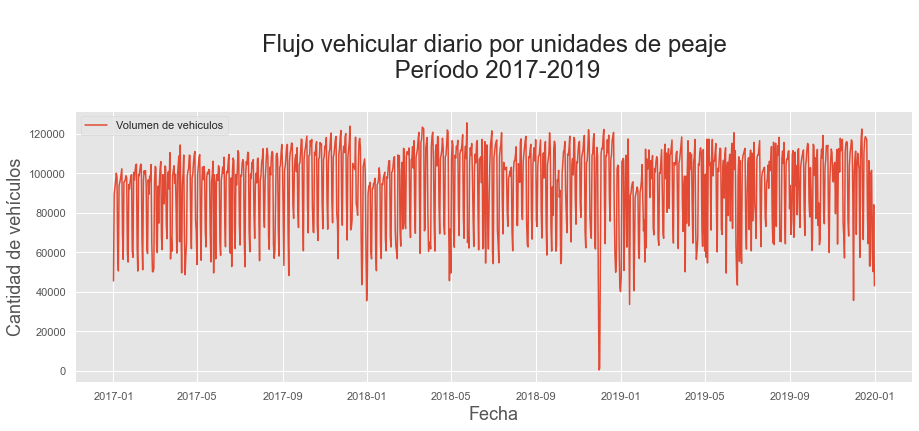

In [19]:
diario_ambos_sentidos = dataset.resample('D', on = 'fecha').sum()
plt.figure(figsize = (15,5))
plt.plot(diario_ambos_sentidos.index, diario_ambos_sentidos.cantidad_pasos, label = 'Volumen de vehiculos')
plt.title('\nFlujo vehicular diario por unidades de peaje\n Período 2017-2019\n', fontsize=24)
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Cantidad de vehículos', fontsize=18)
plt.legend()
plt.show()

Voy a introducir un límite en "y" para poder visualizar mejor. Luego trataremos outliers. 

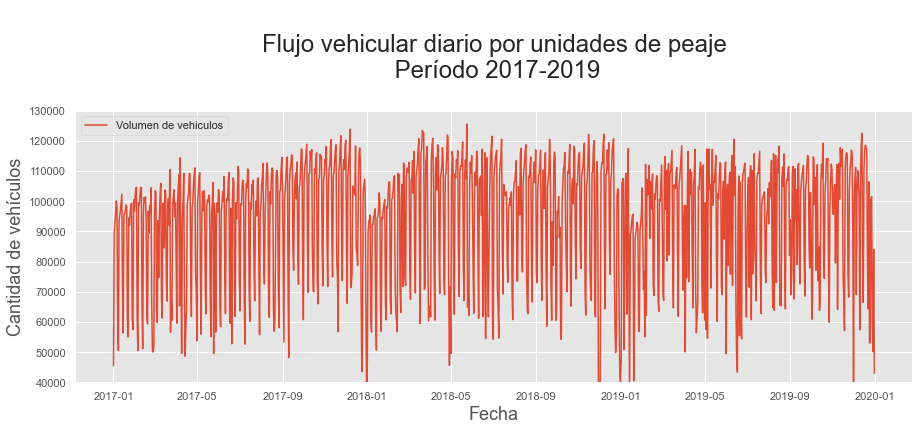

In [20]:
diario_ambos_sentidos = dataset.resample('D', on = 'fecha').sum()
plt.figure(figsize = (15,5))
plt.plot(diario_ambos_sentidos.index, diario_ambos_sentidos.cantidad_pasos, label = 'Volumen de vehiculos')
plt.title('\nFlujo vehicular diario por unidades de peaje\n Período 2017-2019\n', fontsize=24)
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Cantidad de vehículos', fontsize=18)
plt.ylim(40000,130000)
plt.legend()
plt.show()

Como es de esperar, se observa una caída abrusca en el flujo vehícular en el início de cada año. Luego lo analizaremos más detenidamente. Por otra parte, el año 2017 parece mostrar un crecimiento sostenido durante todo el año, mientras que 2018 y 2019 parecen más estables. 

Vamos a hacer el mismo análisis, pero desagregando sentido centro y provincia. Cabe la siguiente pregunta: ¿se iguala diariamente el flujo vehicular entre ambos sentidos?


In [21]:
#máscara x sentido
sentido_Centro = dataset[(dataset['sentido']=='Centro')]
sentido_Provincia = dataset[(dataset['sentido']=='Provincia')]

#Resampleamos a día
diario_Centro = sentido_Centro.resample('D', on = 'fecha').sum()
diario_Provincia = sentido_Provincia.resample('D', on = 'fecha').sum()

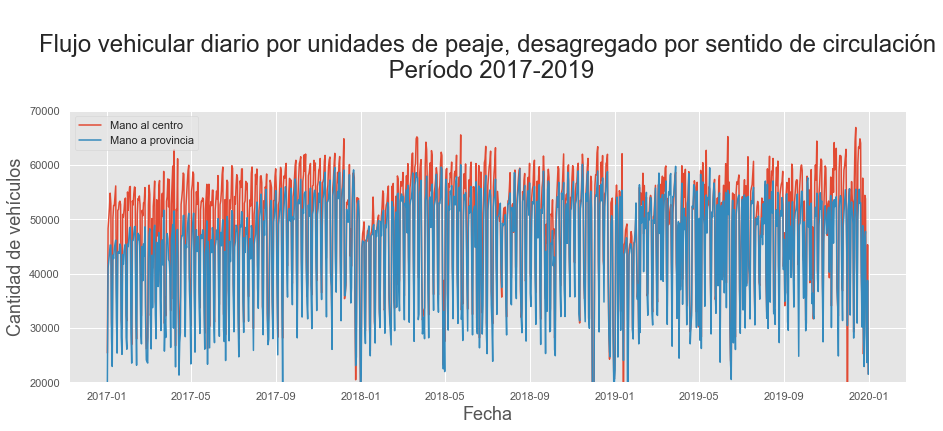

In [22]:
plt.figure(figsize = (15,5))
plt.plot(diario_Centro.index, diario_Centro.cantidad_pasos, label = 'Mano al centro')
plt.plot(diario_Provincia.index, diario_Provincia.cantidad_pasos, label = 'Mano a provincia')
plt.title('\nFlujo vehicular diario por unidades de peaje, desagregado por sentido de circulación\n Período 2017-2019\n', fontsize=24)
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Cantidad de vehículos', fontsize=18)
#plt.xlim(datetime.date(1990,1,1), datetime.date(2018,1,1))
plt.ylim(20000,70000)
plt.legend()
plt.show()

Entonces, ¿se iguala el volumen de vehículos que recorren la autopista diariamente en sentido centro y provincia? No parece ser el caso, sobre todo el primer año de análisis. Siempre (o casi) el flujo vehicular mano al centro es superior al flujo mano a provincia. Vamos a representar gráficamente la diferencia neta entre ambos sentidos de circulación, para observar más nítidamente.

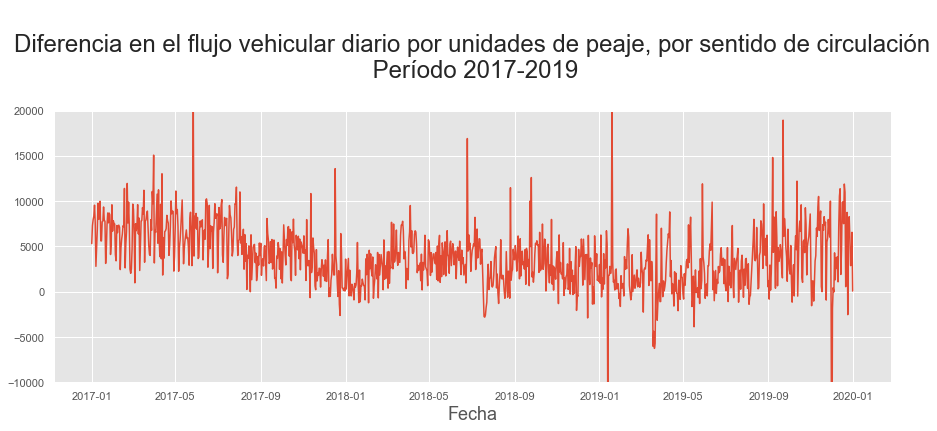

In [23]:
diferencia_diaria = diario_Centro-diario_Provincia

plt.figure(figsize = (15,5))
plt.plot(diferencia_diaria.index, diferencia_diaria.cantidad_pasos)
#plt.plot(diario_Provincia.index, diario_Provincia.cantidad_pasos, label = 'Mano a provincia')
plt.title('\nDiferencia en el flujo vehicular diario por unidades de peaje, por sentido de circulación\n Período 2017-2019\n', fontsize=24)
plt.xlabel('Fecha', fontsize=18)
#plt.ylabel('Cantidad de vehículos', fontsize=18)
#plt.xlim(datetime.date(1990,1,1), datetime.date(2018,1,1))
plt.ylim(-10000,20000)
#plt.legend()
plt.show()

Esta es la diferencia neta entre mano centro y provincia. Comprobamos lo anterior. Pero esa brecha no parece estable, lineal, sino más bien una parábola. Vamos a resamplear a mensual.

In [24]:
#Resampleamos a mes
mensual_Centro = sentido_Centro.resample('M', on = 'fecha').sum()
mensual_Provincia = sentido_Provincia.resample('M', on = 'fecha').sum()

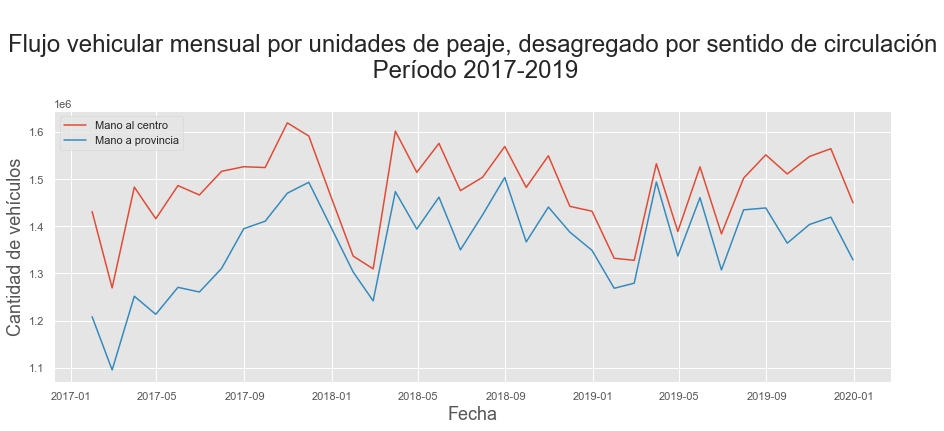

In [25]:
plt.figure(figsize = (15,5))
plt.plot(mensual_Centro.index, mensual_Centro.cantidad_pasos, label = 'Mano al centro')
plt.plot(mensual_Provincia.index, mensual_Provincia.cantidad_pasos, label = 'Mano a provincia')
plt.title('\nFlujo vehicular mensual por unidades de peaje, desagregado por sentido de circulación\n Período 2017-2019\n', fontsize=24)
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Cantidad de vehículos', fontsize=18)
#plt.xlim(datetime.date(1990,1,1), datetime.date(2018,1,1))
#plt.ylim(20000,70000)
plt.legend()
plt.show()

Vemos ambas series, resampleadas a mensual. En 2017 parece ir cerrandose conforme avanza el año. En 2018 se mantiene estable, y en 2019 parece cerrarse aún más en el primer semestre del año, pero luego vuelve a hacerse divergente. Si tuviese que intuir el motivo de esta brecha, diría que "el viaje al trabajo" es un bien necesario, menos elástico, mientras que la vuelta (siempre asumiendo que en Capital se trabaja mientras que en sentido a provincia se vive), es un bien normal o de lujo. La lógica sería que usar un camino alternativo a la autopista insume naturalmente más tiempo. Pero ese tiempo es más valioso a la mañana, que para la hora del regreso. También es posible que el retorno a casa incluya realizar las compras en el camino o realizar otras actividades, para las cuales no sea necesario tomar la autopista o no lo justifique. 

Vamos a graficar la diferencia neta mensual y tratar de aproximar la brecha con una media móvil.

In [28]:
diferencia_mensual = mensual_Centro - mensual_Provincia
diferencia_mensual.head()

,hora_fin,cantidad_pasos
fecha,,
2017-01-31,43035,223113
2017-02-28,38179,174056
2017-03-31,43080,231420
2017-04-30,39321,202718
2017-05-31,39639,215747


In [29]:
ventana = 8
diferencia_mensual_promedio = diferencia_mensual.cantidad_pasos.rolling(window=ventana, center = True).mean()
diferencia_mensual_promedio

fecha
2017-01-31           NaN
2017-02-28           NaN
2017-03-31           NaN
2017-04-30           NaN
2017-05-31    198802.500
2017-06-30    185137.625
2017-07-31    182021.625
2017-08-31    165353.000
2017-09-30    148090.875
2017-10-31    125331.125
2017-11-30    108104.000
2017-12-31     98392.375
2018-01-31     96999.875
2018-02-28     97038.000
2018-03-31     94084.125
2018-04-30     91798.750
2018-05-31     91937.125
2018-06-30    102163.250
2018-07-31    107266.625
2018-08-31     98052.375
2018-09-30     93380.875
2018-10-31     87072.125
2018-11-30     77453.250
2018-12-31     72329.000
2019-01-31     70629.125
2019-02-28     64349.875
2019-03-31     60328.125
2019-04-30     61896.125
2019-05-31     65603.625
2019-06-30     76009.000
2019-07-31     87974.750
2019-08-31    101273.000
2019-09-30    109885.125
2019-10-31           NaN
2019-11-30           NaN
2019-12-31           NaN
Freq: M, Name: cantidad_pasos, dtype: float64

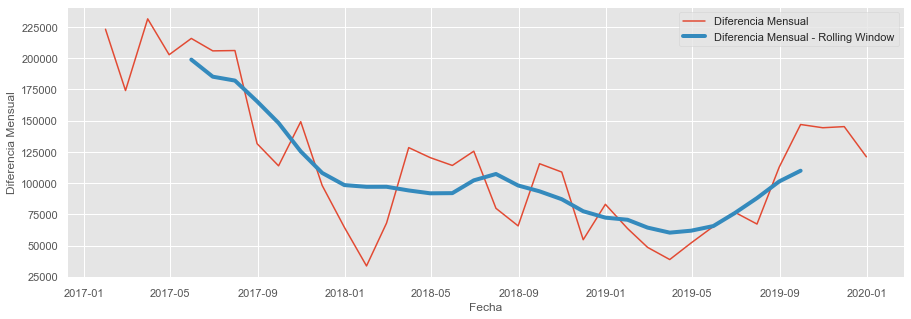

In [71]:
plt.figure(figsize = (15,5))
plt.plot(diferencia_mensual.index, diferencia_mensual.cantidad_pasos, label = 'Diferencia Mensual')
plt.plot(diferencia_mensual_promedio, lw = 4, label = 'Diferencia Mensual - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Diferencia Mensual')
plt.legend()
plt.show()

El análisis anterior, expresado por la diferencia neta. Miremos el año 2019

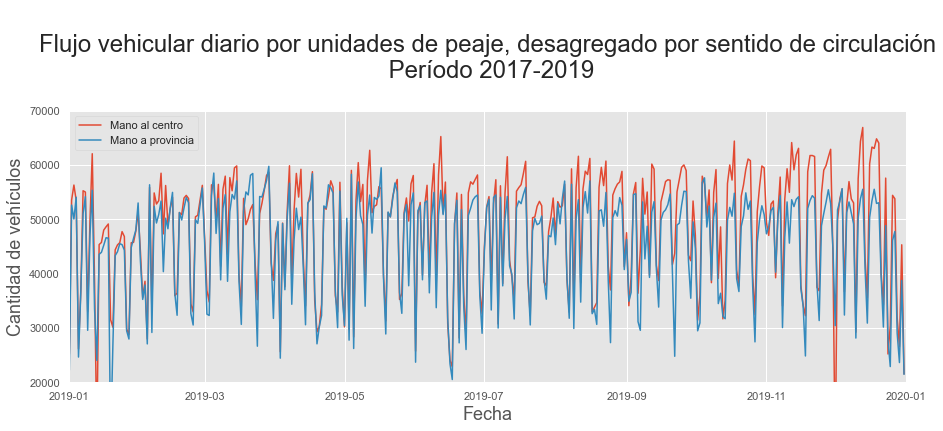

In [31]:
plt.figure(figsize = (15,5))
plt.plot(diario_Centro.index, diario_Centro.cantidad_pasos, label = 'Mano al centro')
plt.plot(diario_Provincia.index, diario_Provincia.cantidad_pasos, label = 'Mano a provincia')
plt.title('\nFlujo vehicular diario por unidades de peaje, desagregado por sentido de circulación\n Período 2017-2019\n', fontsize=24)
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Cantidad de vehículos', fontsize=18)
plt.xlim(datetime.date(2019,1,1), datetime.date(2020,1,1))
plt.ylim(20000,70000)
plt.legend()
plt.show()

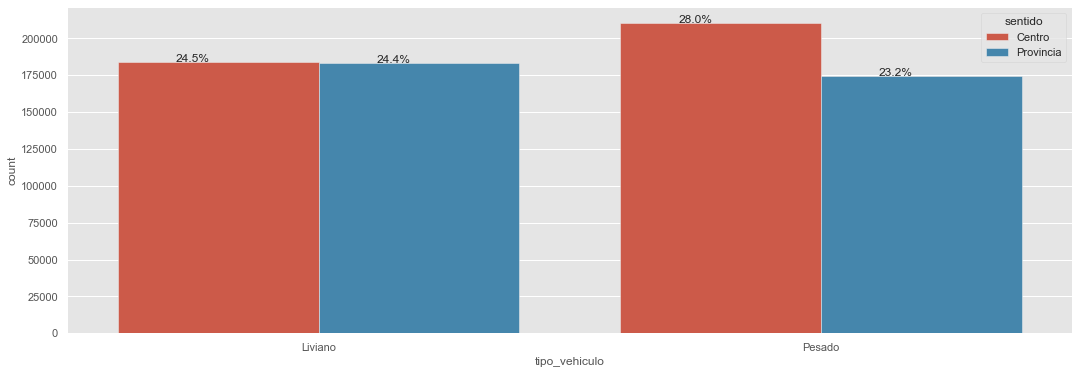

In [88]:
plt.figure(figsize=(18,6))
ax=sns.countplot(data = dataset, x = 'tipo_vehiculo', hue= 'sentido')
without_hue(ax,dataset.forma_pago)

(0.0, 500.0)

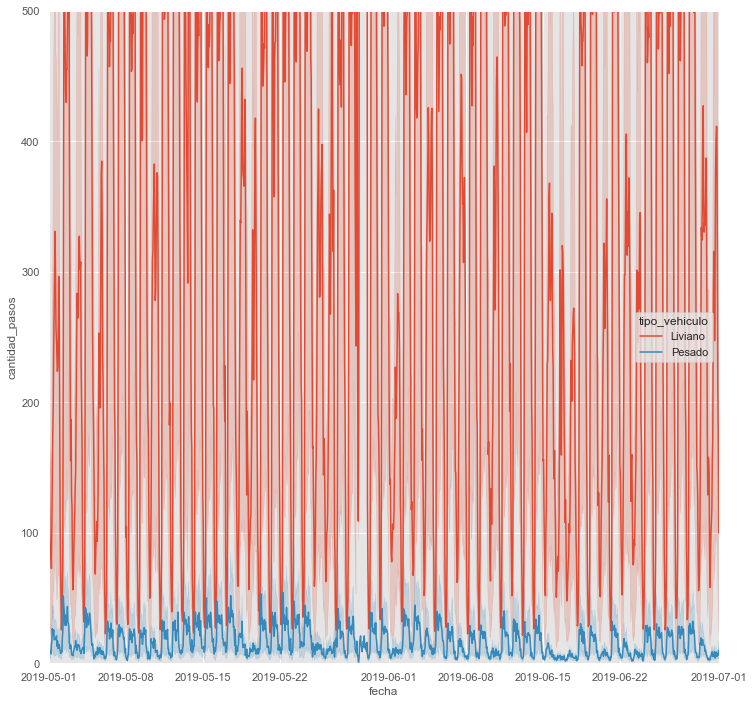

In [91]:
sns.lineplot(data=dataset, x="fecha", y="cantidad_pasos", hue="tipo_vehiculo")
plt.xlim(datetime.date(2019,5,1), datetime.date(2019,7,1))
plt.ylim(0,500)

Ahora vamos a ver como se distribuye la forma de pago del peaje, según sea sentido Centro o Provincia

In [80]:
dataset.replace('TARJETA DISCAPACIDAD', 'T. DISCAPACIDAD', inplace=True)
dataset['forma_pago'].value_counts()

EFECTIVO           238869
TELEPASE           204612
EXENTO             105903
INFRACCION          78000
NO COBRADO          66679
T. DISCAPACIDAD     58475
MONEDERO               14
Name: forma_pago, dtype: int64

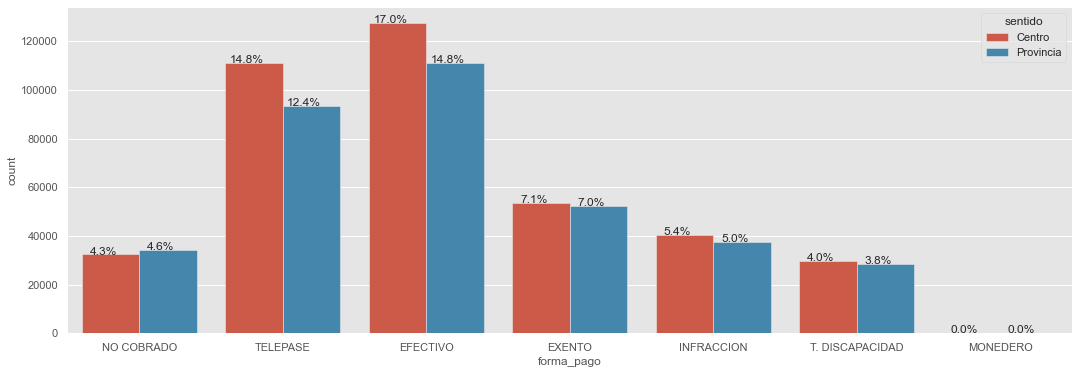

In [81]:
plt.figure(figsize=(18,6))
ax=sns.countplot(data = dataset, x = 'forma_pago', hue= 'sentido')
without_hue(ax,dataset.forma_pago)

In [93]:
#sns.lineplot(data=dataset, x="fecha", y="cantidad_pasos", hue="forma_pago", style="forma_pago")

In [108]:
dataset.groupby(['fecha'])['forma_pago'].value_counts()

TypeError: unhashable type: 'list'

In [106]:
#dataset['evolucion_fp'] = dataset.groupby(['fecha'])['forma_pago'].value_counts()
#dataset = dataset.groupby(['fecha'])['forma_pago'].apply(
#             lambda x: x.tolist()).reset_index()
#dataset.head()

In [36]:
dataset['ds'] = dataset['fecha']
dataset['y'] = dataset['cantidad_pasos']

In [37]:
mask1 = dataset.drop(columns=['hora_fin','dia', 'estacion', 'sentido', 'tipo_vehiculo', 'forma_pago', 'cantidad_pasos', 'fecha'])

In [38]:
mask1.head()

,ds,y
19,2019-01-01 01:00:00,146
20,2019-01-01 01:00:00,59
21,2019-01-01 01:00:00,1
22,2019-01-01 01:00:00,147
23,2019-01-01 01:00:00,106


In [39]:
m = Prophet(daily_seasonality=True)
m.fit(mask1)

In [40]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
26629,2020-12-26 23:00:00
26630,2020-12-27 23:00:00
26631,2020-12-28 23:00:00
26632,2020-12-29 23:00:00
26633,2020-12-30 23:00:00


In [41]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
26629,2020-12-26 23:00:00,188.809948,-350.702738,718.393169
26630,2020-12-27 23:00:00,203.667965,-314.459658,737.332931
26631,2020-12-28 23:00:00,222.025644,-316.112070,760.070135
26632,2020-12-29 23:00:00,225.013201,-291.487633,722.608436
26633,2020-12-30 23:00:00,229.883203,-270.396518,751.373605


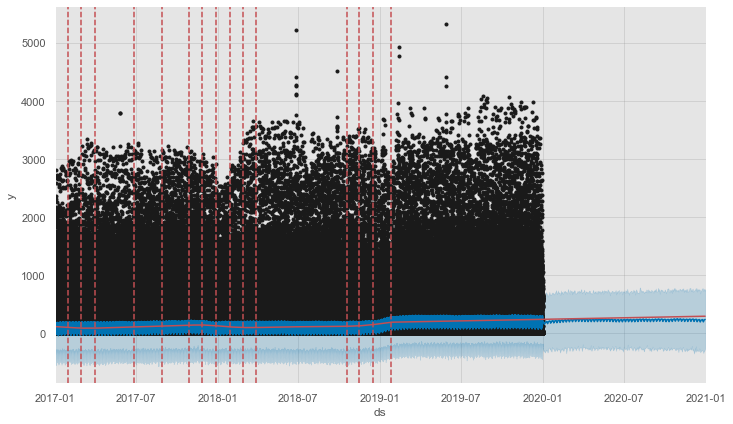

In [42]:
from fbprophet.plot import add_changepoints_to_plot
fig1 = m.plot(forecast)
plt.xlim(datetime.date(2017,1,1), datetime.date(2021,1,1))
a = add_changepoints_to_plot(fig1.gca(), m, forecast)

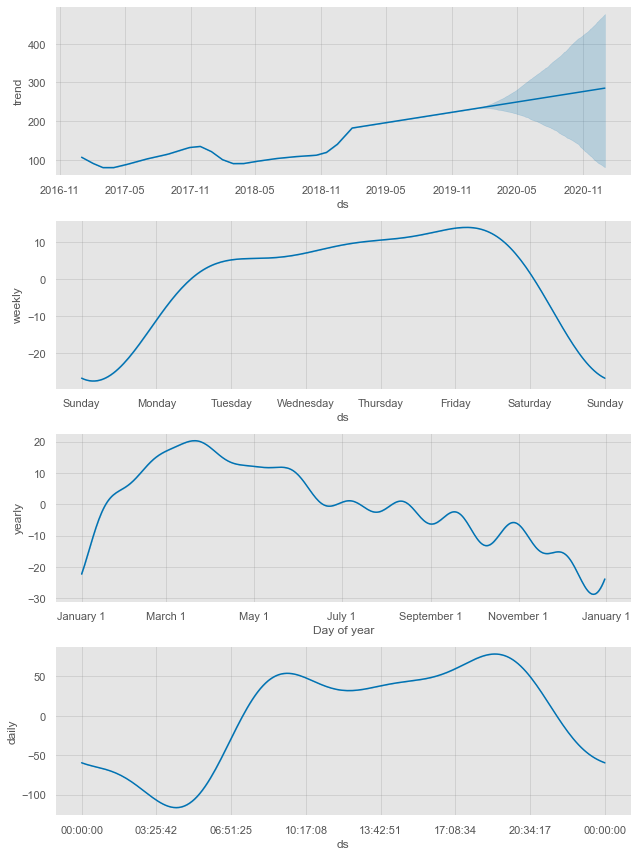

In [43]:
fig2 = m.plot_components(forecast)

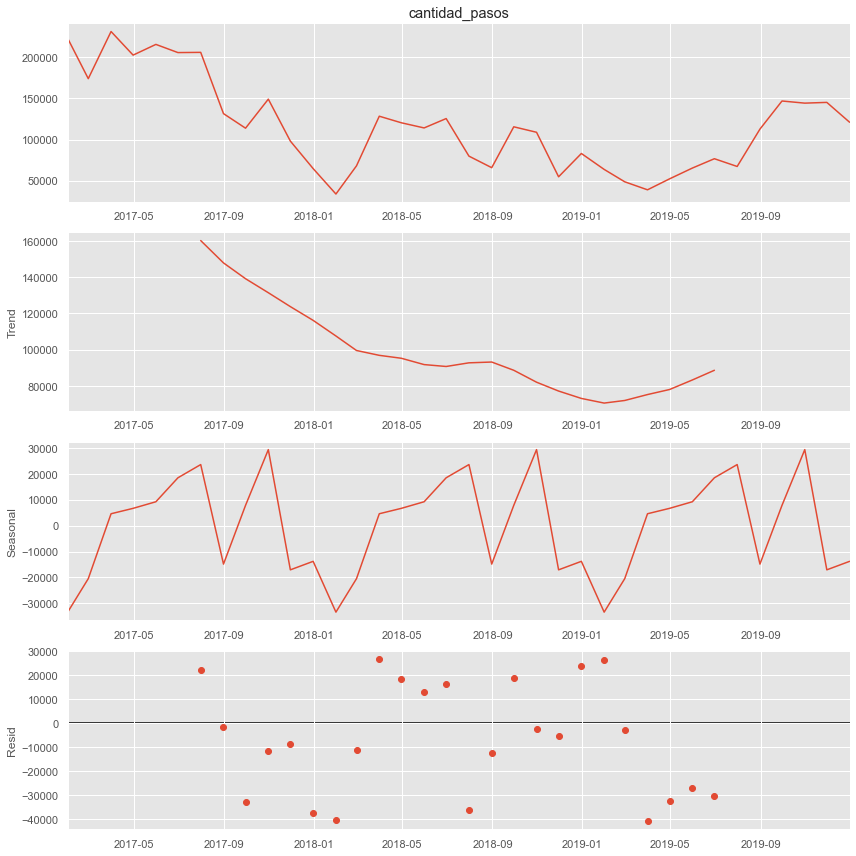

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(diferencia_mensual.cantidad_pasos, model='additive')
result.plot()
plt.show()

In [45]:
result.trend

fecha
2017-01-31              NaN
2017-02-28              NaN
2017-03-31              NaN
2017-04-30              NaN
2017-05-31              NaN
2017-06-30              NaN
2017-07-31    160109.333333
2017-08-31    147796.041667
2017-09-30    139082.291667
2017-10-31    131357.166667
2017-11-30    123690.666667
2017-12-31    116109.458333
2018-01-31    107502.333333
2018-02-28     99500.166667
2018-03-31     96829.416667
2018-04-30     95219.583333
2018-05-31     91730.416667
2018-06-30     90686.958333
2018-07-31     92701.000000
2018-08-31     93139.541667
2018-09-30     88597.625000
2018-10-31     82022.125000
2018-11-30     77143.125000
2018-12-31     73071.541667
2019-01-31     70510.875000
2019-02-28     71941.583333
2019-03-31     75205.083333
2019-04-30     77990.833333
2019-05-31     83240.541667
2019-06-30     88597.083333
2019-07-31              NaN
2019-08-31              NaN
2019-09-30              NaN
2019-10-31              NaN
2019-11-30              NaN
2019-12-31    

In [46]:
result.seasonal

fecha
2017-01-31   -33349.904514
2017-02-28   -20449.675347
2017-03-31     4569.949653
2017-04-30     6651.991319
2017-05-31     9193.720486
2017-06-30    18431.178819
2017-07-31    23525.532986
2017-08-31   -14841.092014
2017-09-30     7803.741319
2017-10-31    29286.053819
2017-11-30   -17048.196181
2017-12-31   -13773.300347
2018-01-31   -33349.904514
2018-02-28   -20449.675347
2018-03-31     4569.949653
2018-04-30     6651.991319
2018-05-31     9193.720486
2018-06-30    18431.178819
2018-07-31    23525.532986
2018-08-31   -14841.092014
2018-09-30     7803.741319
2018-10-31    29286.053819
2018-11-30   -17048.196181
2018-12-31   -13773.300347
2019-01-31   -33349.904514
2019-02-28   -20449.675347
2019-03-31     4569.949653
2019-04-30     6651.991319
2019-05-31     9193.720486
2019-06-30    18431.178819
2019-07-31    23525.532986
2019-08-31   -14841.092014
2019-09-30     7803.741319
2019-10-31    29286.053819
2019-11-30   -17048.196181
2019-12-31   -13773.300347
Freq: M, Name: seasona

In [47]:
result.resid

fecha
2017-01-31             NaN
2017-02-28             NaN
2017-03-31             NaN
2017-04-30             NaN
2017-05-31             NaN
2017-06-30             NaN
2017-07-31    22423.133681
2017-08-31    -1444.949653
2017-09-30   -33092.032986
2017-10-31   -11515.220486
2017-11-30    -8571.470486
2017-12-31   -37715.157986
2018-01-31   -40483.428819
2018-02-28   -11069.491319
2018-03-31    26965.633681
2018-04-30    18498.425347
2018-05-31    13174.862847
2018-06-30    16378.862847
2018-07-31   -36438.532986
2018-08-31   -12570.449653
2018-09-30    19076.633681
2018-10-31    -2500.178819
2018-11-30    -5443.928819
2018-12-31    23699.758681
2019-01-31    26468.029514
2019-02-28    -2945.907986
2019-03-31   -40981.032986
2019-04-30   -32513.824653
2019-05-31   -27190.262153
2019-06-30   -30394.262153
2019-07-31             NaN
2019-08-31             NaN
2019-09-30             NaN
2019-10-31             NaN
2019-11-30             NaN
2019-12-31             NaN
Freq: M, Name: resid, 

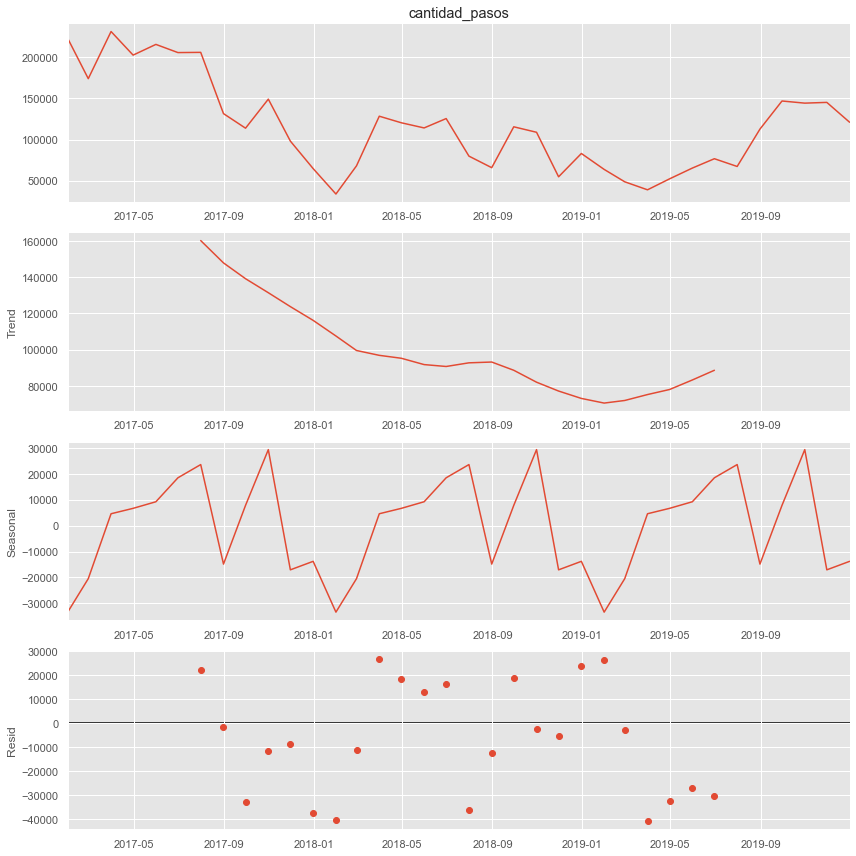

In [58]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

C:\Users\marci\anaconda3\envs\prophet\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='resid', ylabel='Density'>

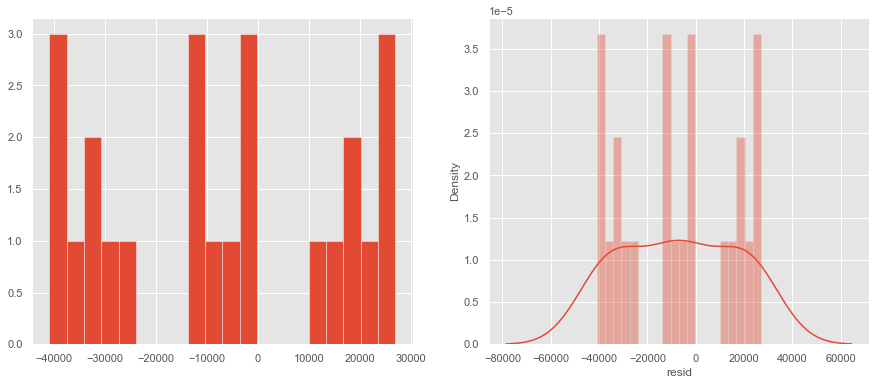

In [60]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.hist(x = result.resid, bins = 20)

plt.subplot(1,2,2)
sns.distplot(result.resid, bins = 20)

In [61]:
from statsmodels.tsa.stattools import acf

nlags =  52*20
autocorr = acf(diferencia_mensual.cantidad_pasos, nlags = nlags)

C:\Users\marci\anaconda3\envs\prophet\lib\site-packages\statsmodels\tsa\stattools.py:666: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


In [62]:
autocorr.shape

(36,)

Text(0.5, 0, 'lag')

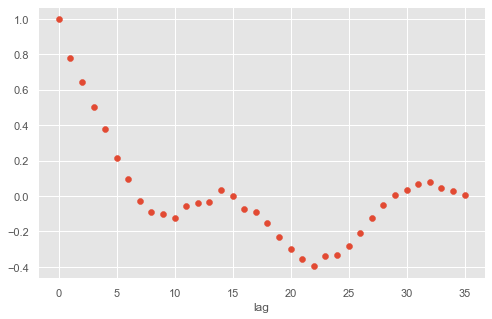

In [64]:
plt.figure(figsize = (8,5))
plt.scatter(np.arange(36), autocorr)
plt.xlabel('lag')